In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform

In [293]:
df = pd.read_csv("cleaned_chatelet.csv")
df = df.drop(columns=['CO2_BEFORE', 'NO_BEFORE', 'NO2_BEFORE', 'PM10_BEFORE', 'YEAR', 'DATE', 'DAY'])
df.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,WEEKDAY,WEEKEND
0,4.0,29.0,101.0,635.0,19.9,46.3,1,1,1,2,0
1,4.0,28.0,89.0,738.0,20.0,46.9,2,1,1,2,0
2,4.0,28.0,81.0,775.0,20.1,46.5,3,1,1,2,0
3,4.0,29.0,71.0,664.0,19.8,45.3,4,1,1,2,0
4,4.0,22.0,66.0,560.0,19.6,44.3,5,1,1,2,0


In [294]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [261]:
# sns.boxplot(df.CO2)

In [262]:
# scaler = preprocessing.MinMaxScaler()
# df[df.columns] = scaler.fit_transform(df[df.columns])

In [263]:
# optimal number of k for kmeans
intertias = []
silhouette = []
kmeans_range = range(2,15)
for num_clusters in kmeans_range:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  intertias.append(kmeans.inertia_)
  # silhouette.append(silhouette_score(df, kmeans.labels_))

/tmp/ipykernel_7533/3258673295.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(kmeans_range, intertias, 'bx-', color='orange')


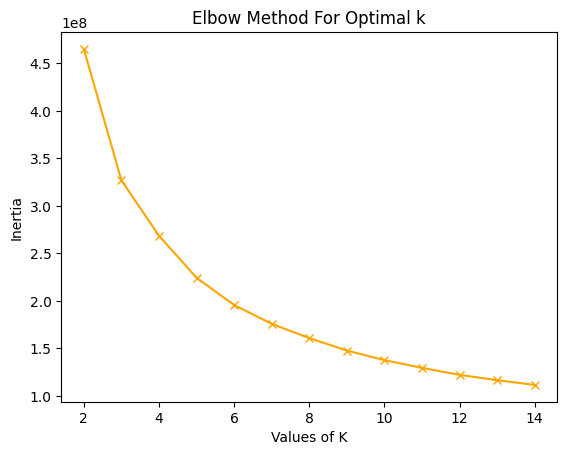

In [264]:
plt.plot(kmeans_range, intertias, 'bx-', color='orange')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [265]:
# plt.plot(kmeans_range, silhouette, 'bx-', color='violet')
# # plt.xlabel('Values of K') 
# plt.ylabel('Silhouette') 
# plt.title('Silhouette Method For Optimal k')
# plt.show()

In [296]:
kmeans = KMeans(n_clusters=8)
label = kmeans.fit_predict(df)
df['cluster'] = label

In [267]:
df.columns

Index(['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI', 'HOUR', 'MONTH',
       'WEEK_OF_YEAR', 'WEEKDAY', 'WEEKEND', 'cluster'],
      dtype='object')

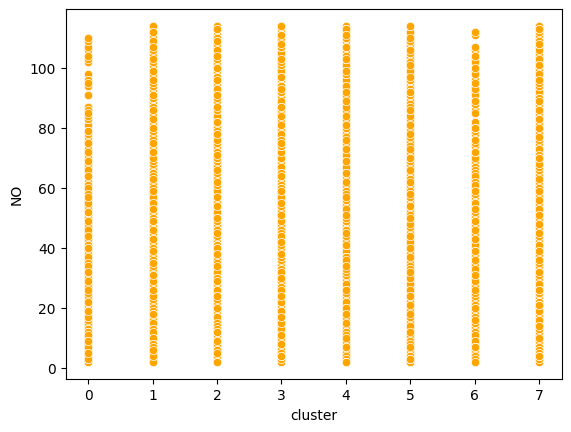

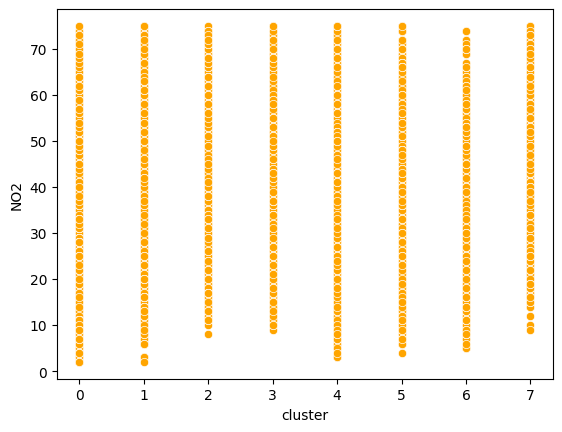

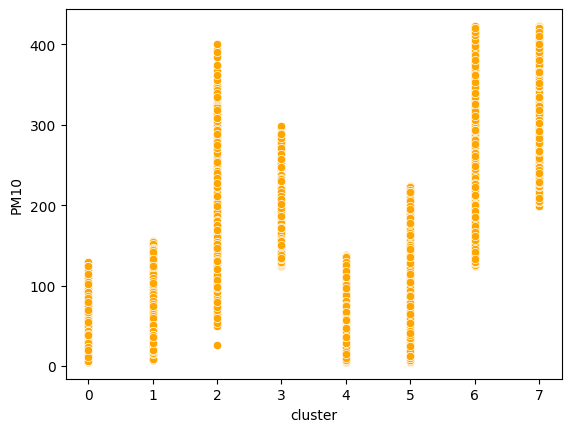

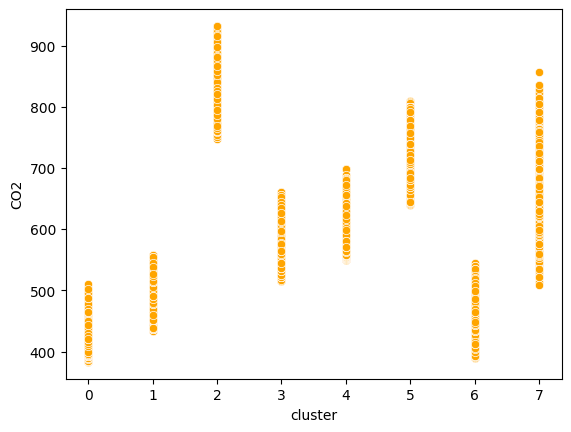

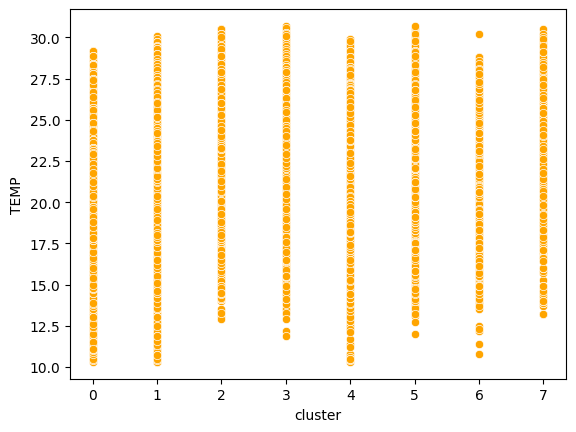

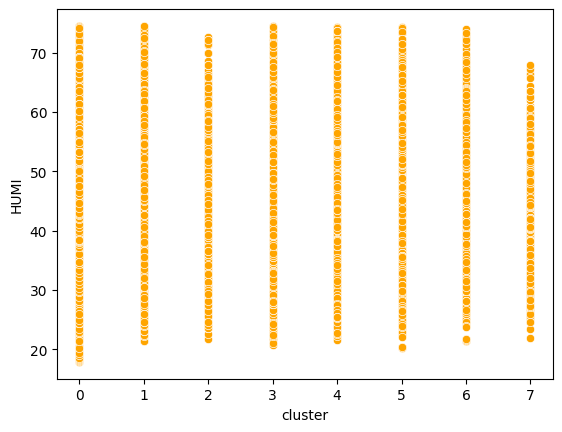

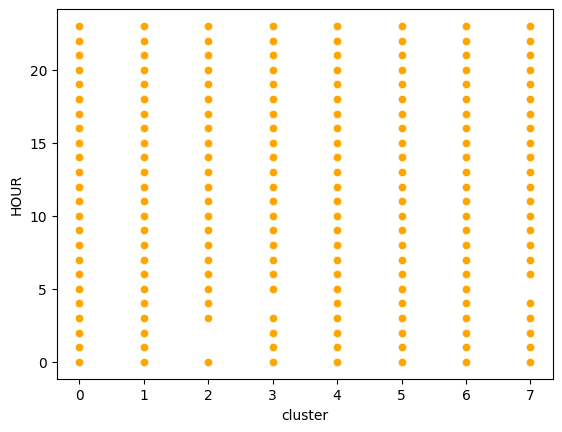

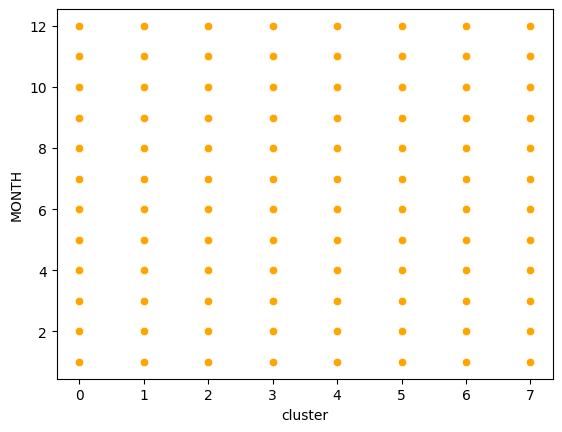

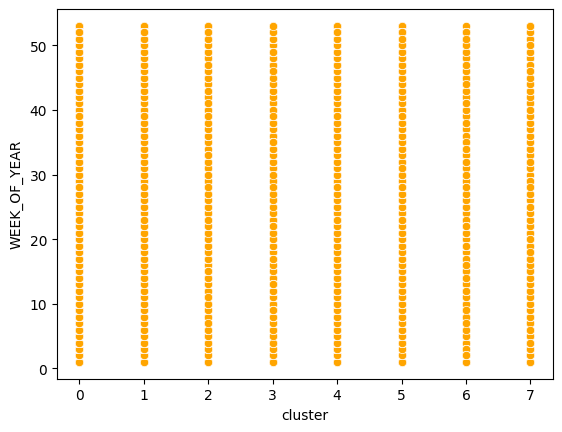

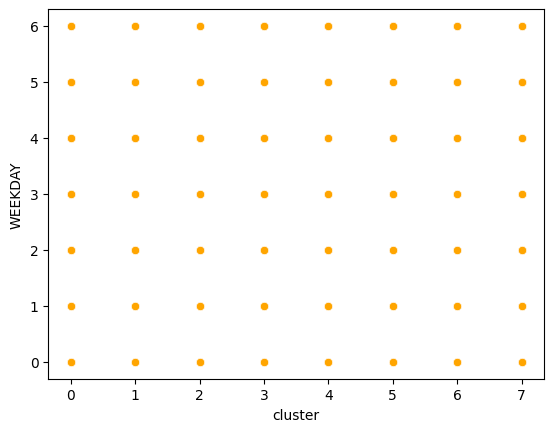

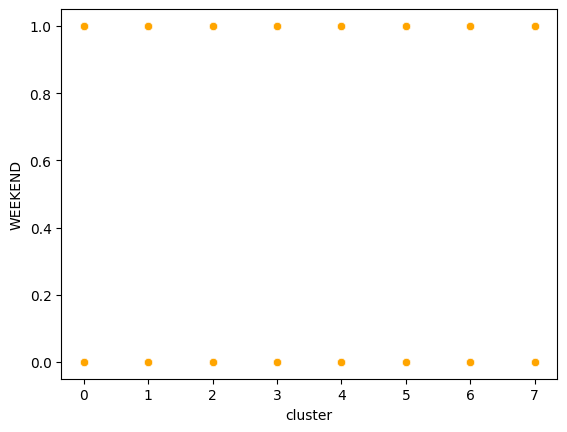

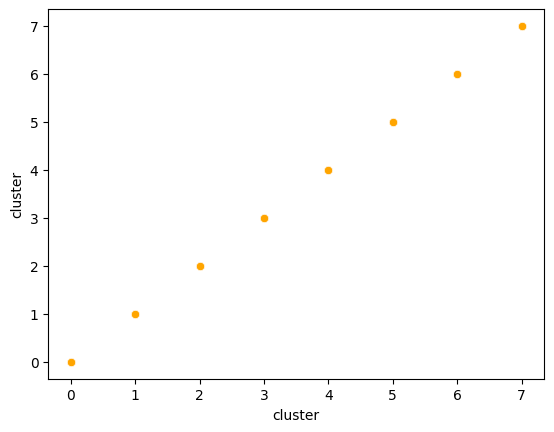

In [268]:
for col in df.columns:
    plt.figure()
    sns.scatterplot(data = df, x=df['cluster'], y=df[col], color='orange')

/home/amelie/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/amelie/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plo

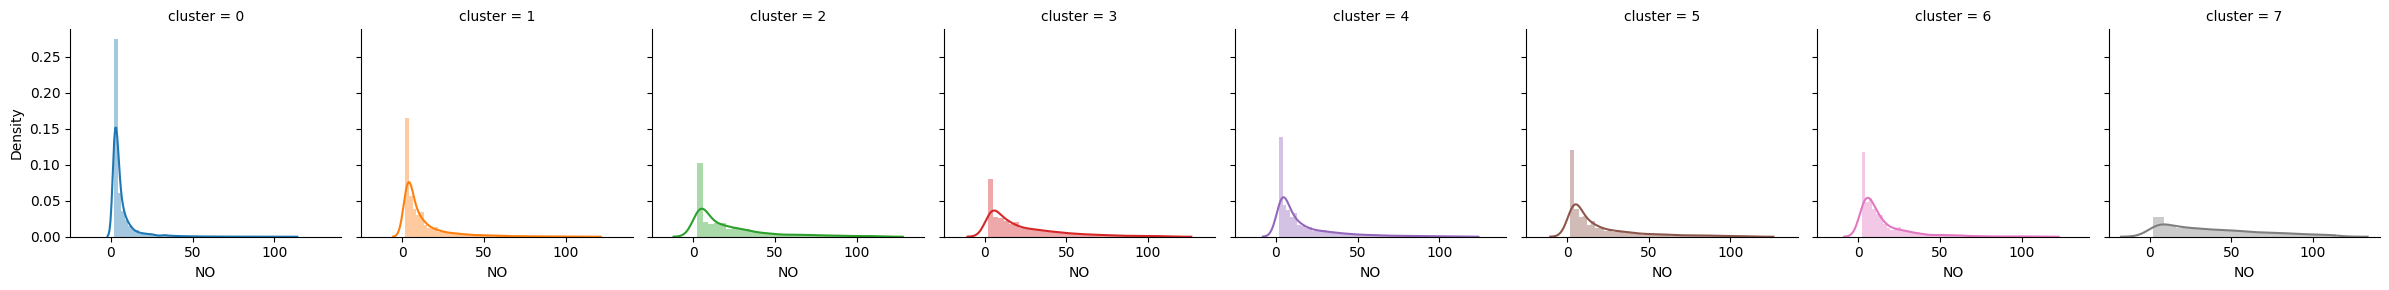

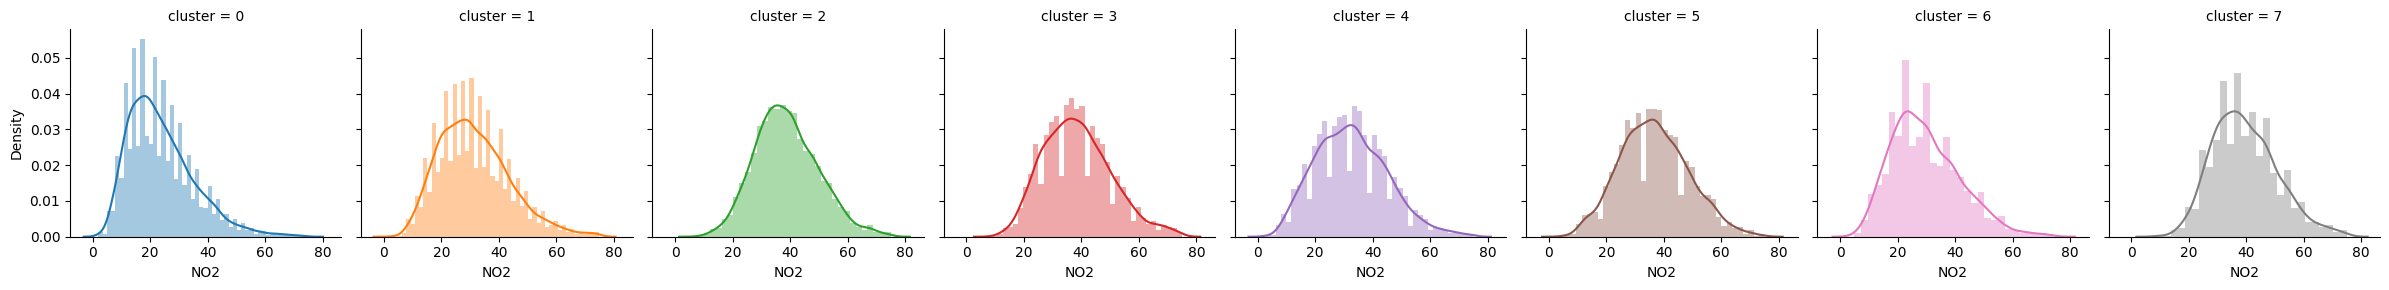

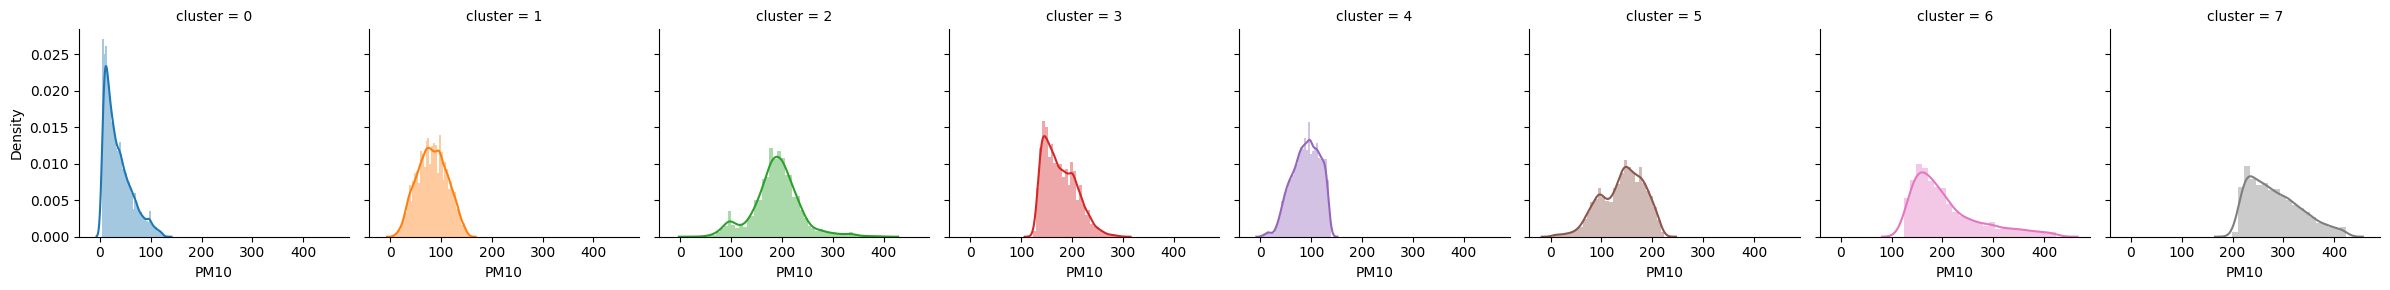

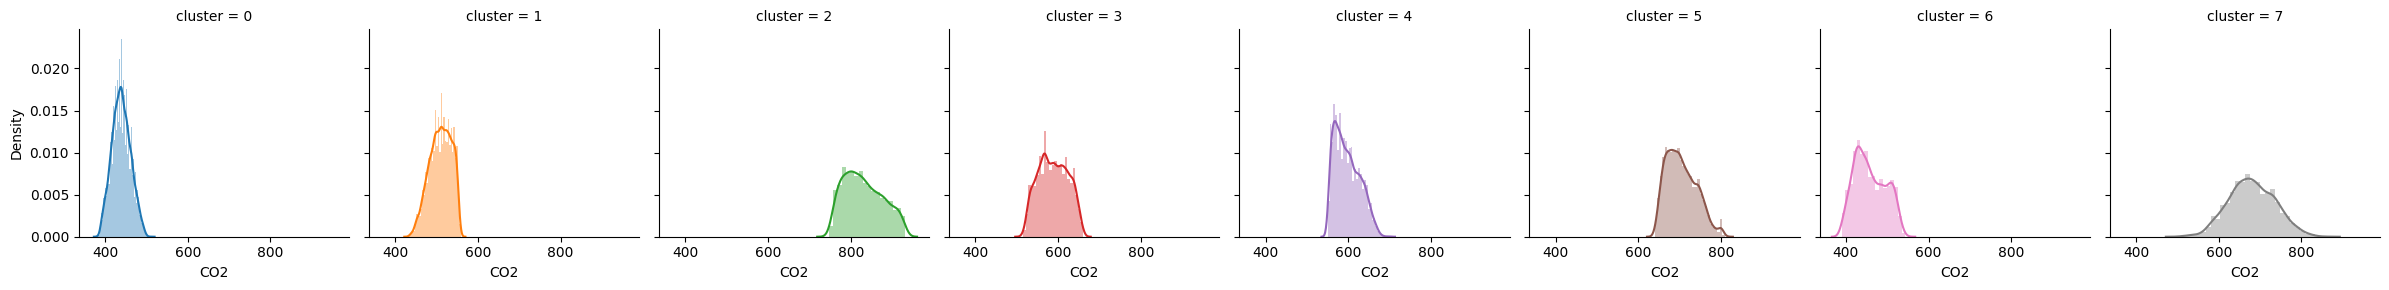

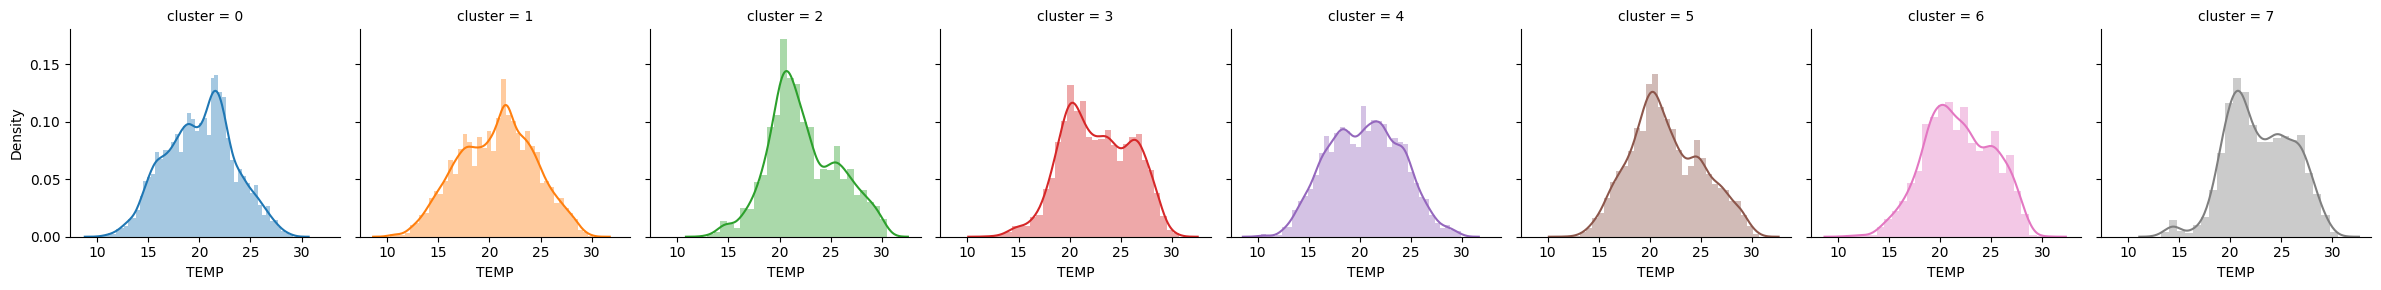

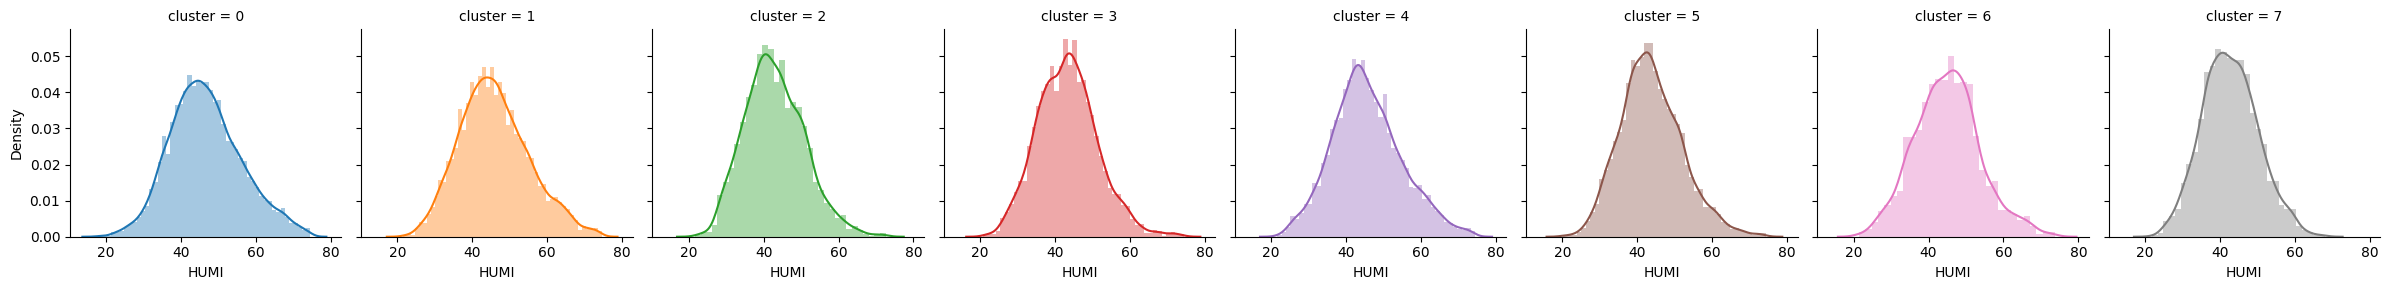

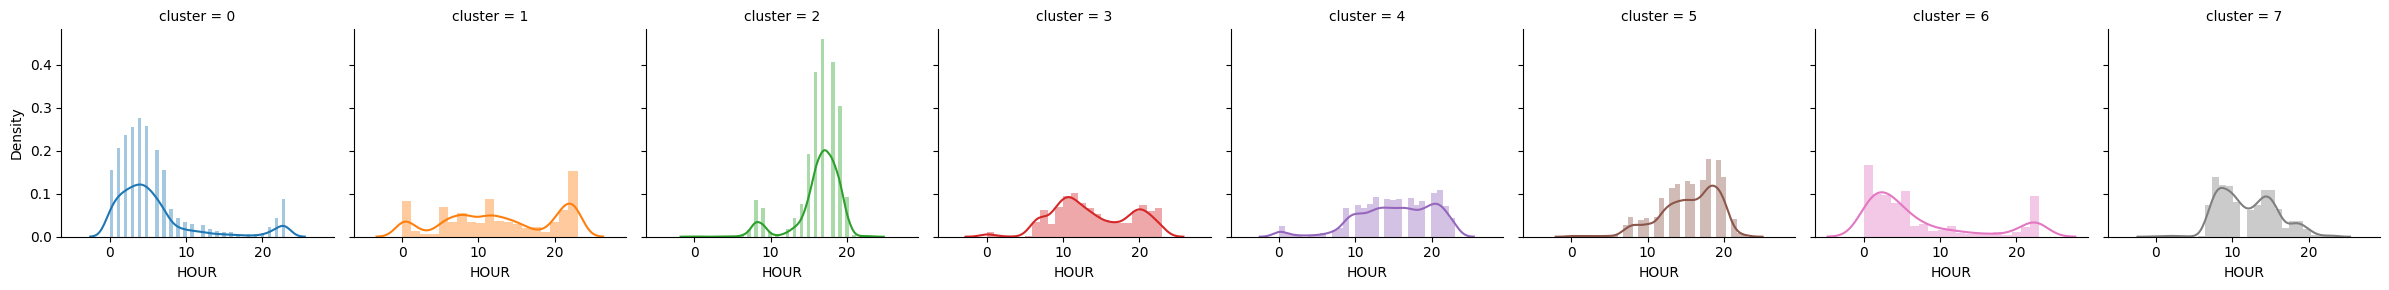

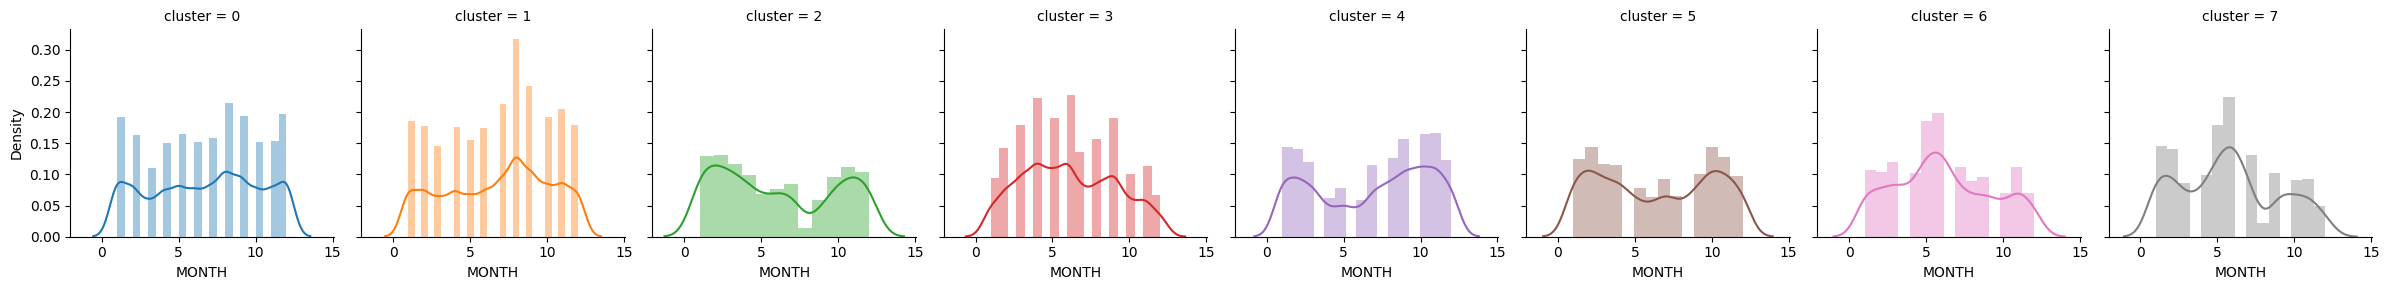

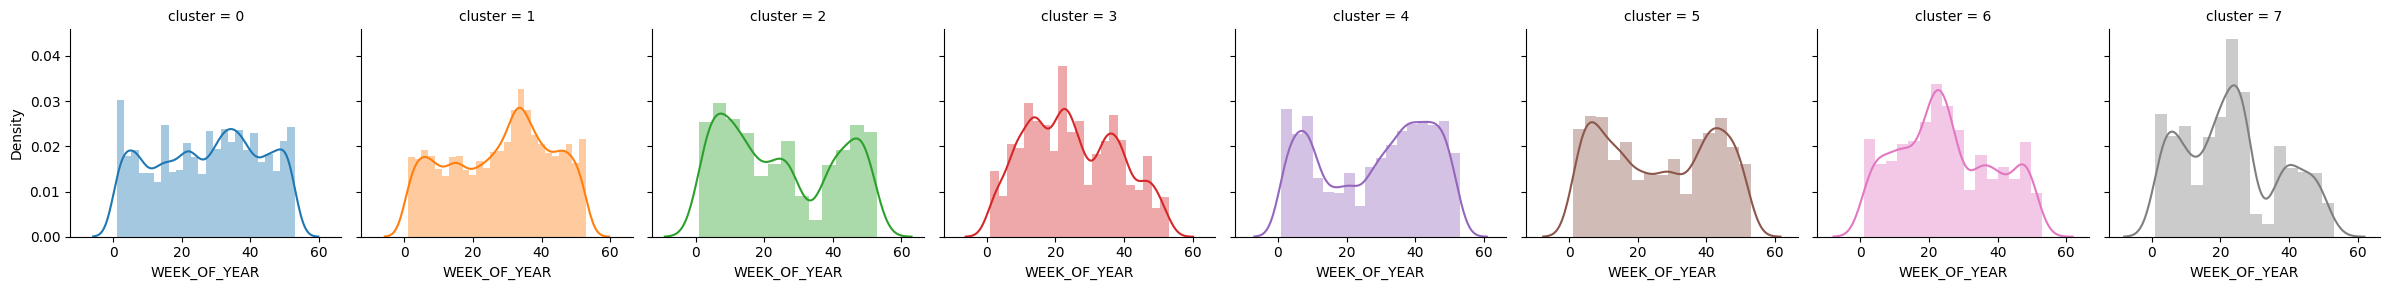

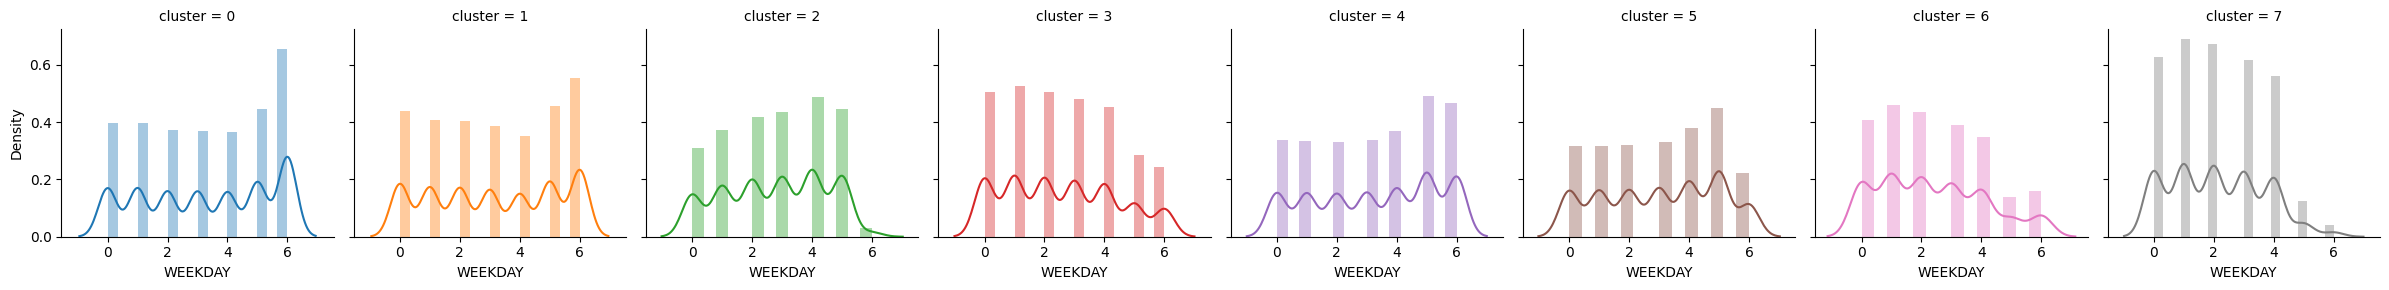

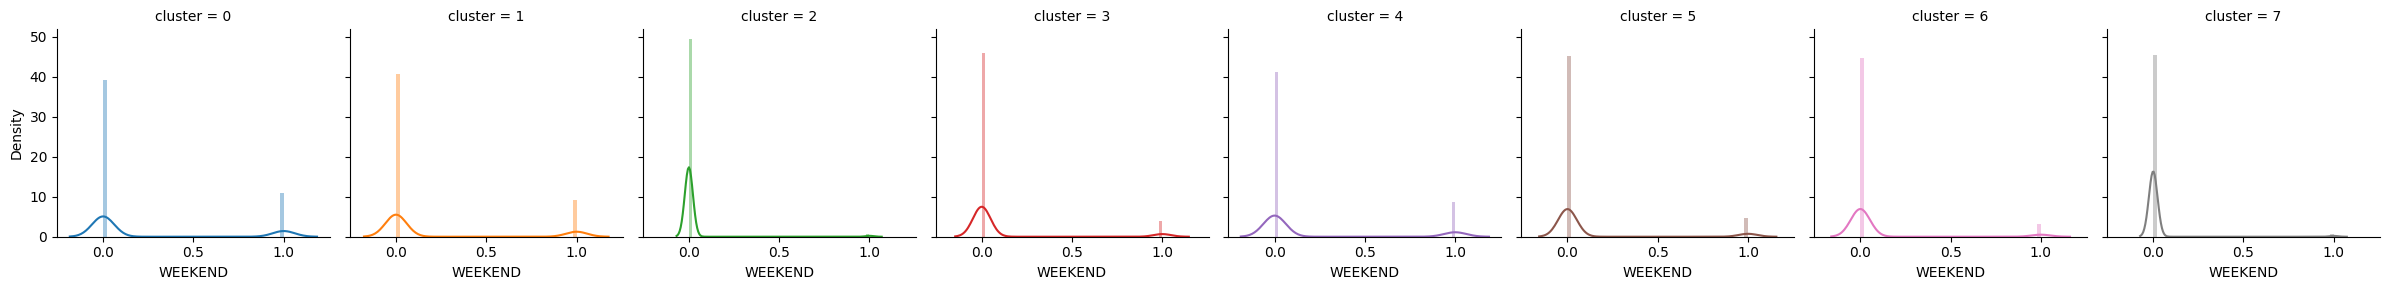

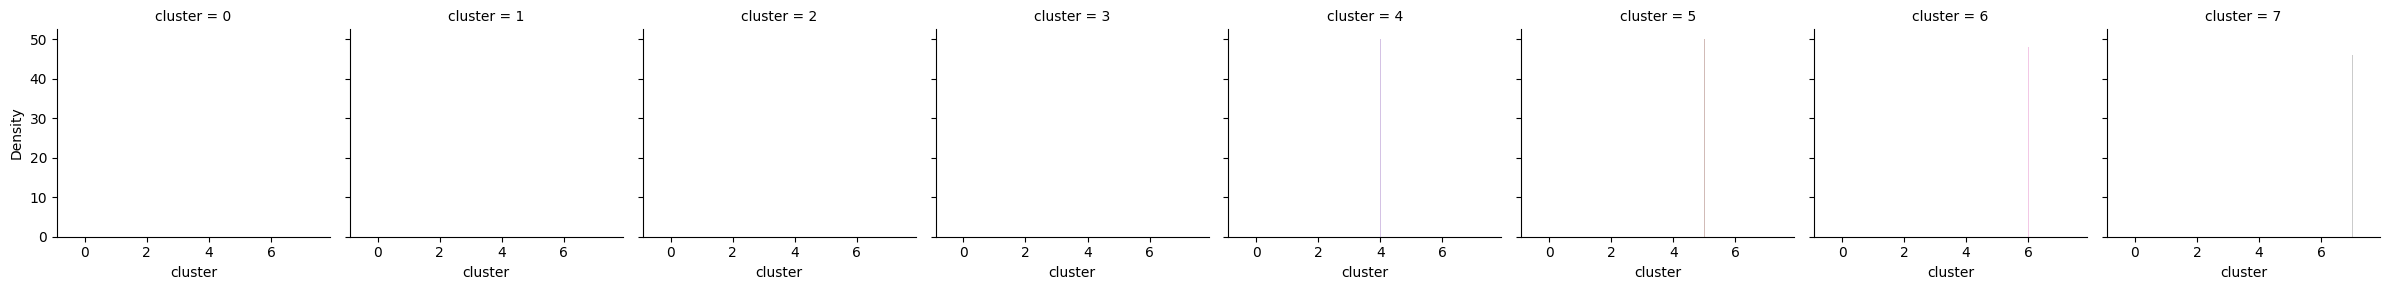

In [269]:
for col in df.columns:
    grid = sns.FacetGrid(df, col='cluster', hue='cluster')
    grid.map(sns.distplot, col)

In [270]:
df0 = df[df.cluster == 0].drop(columns=['cluster'])
df1 = df[df.cluster == 1].drop(columns=['cluster'])
df2 = df[df.cluster == 2].drop(columns=['cluster'])
df3 = df[df.cluster == 3].drop(columns=['cluster', 'WEEKEND', 'WEEKDAY'])
df4 = df[df.cluster == 4].drop(columns=['cluster', 'WEEKEND', 'WEEKDAY'])
df5 = df[df.cluster == 5].drop(columns=['cluster'])
df6 = df[df.cluster == 6].drop(columns=['cluster'])
df7 = df[df.cluster == 7].drop(columns=['cluster'])

# Weekend Clusters

/tmp/ipykernel_7533/2471766295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col], kde=True, norm_hist=True, color='orange')
/tmp/ipykernel_7533/2471766295.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4[col], kde=True, norm_hist=True, color='violet')
/tmp/ipykernel_7533/247176

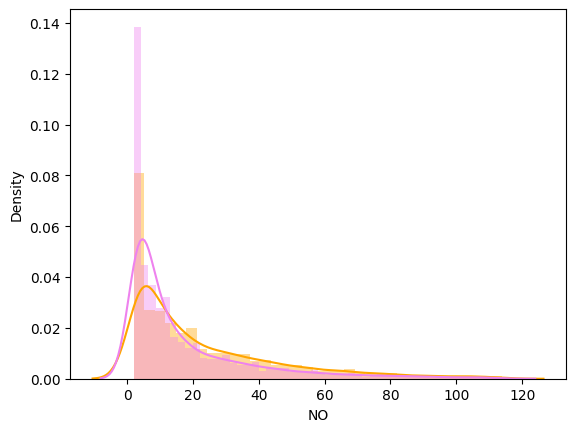

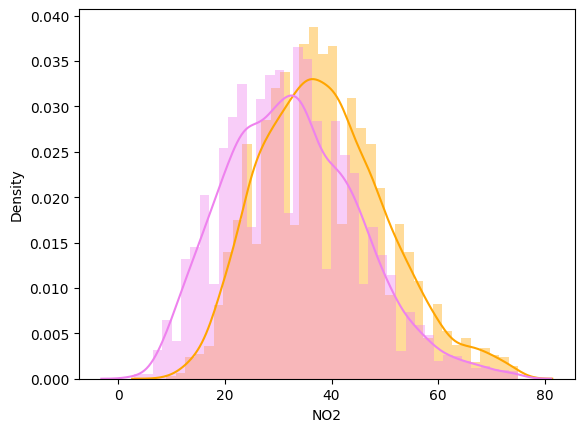

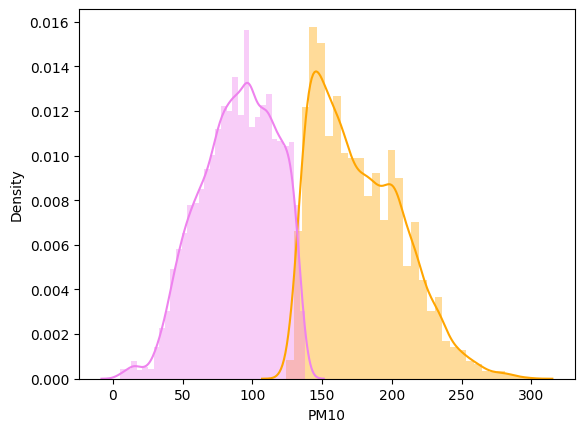

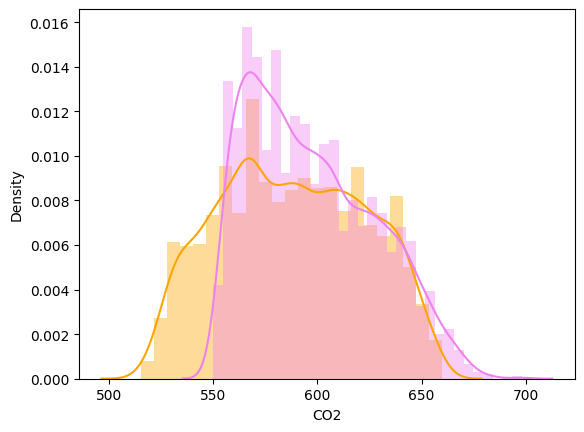

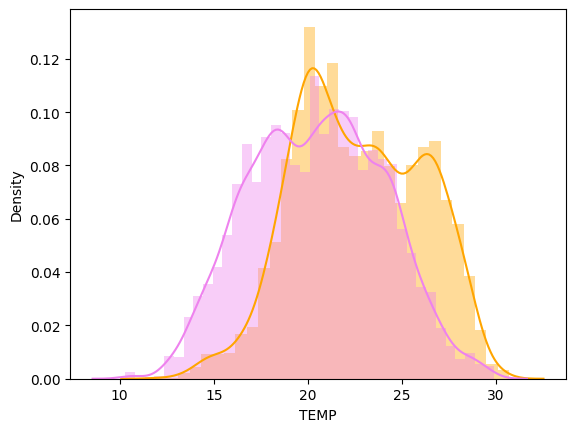

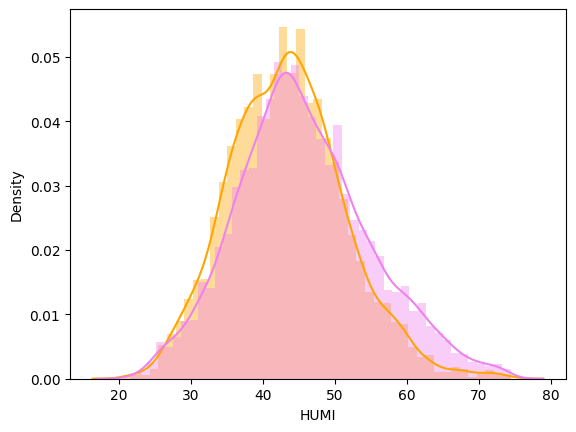

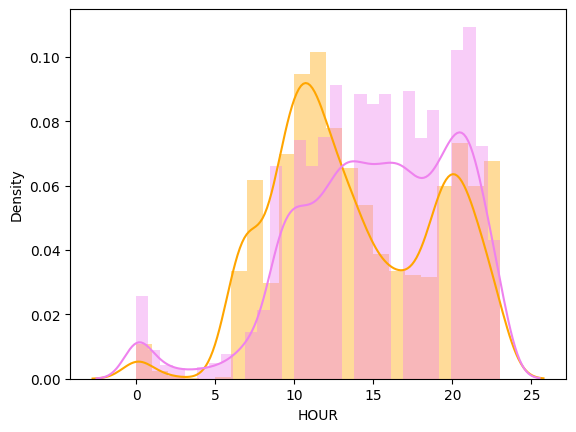

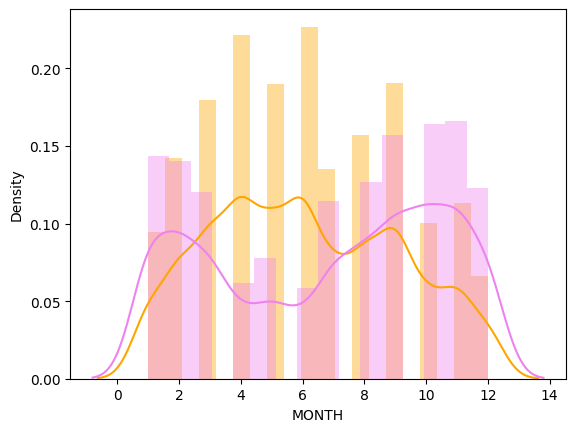

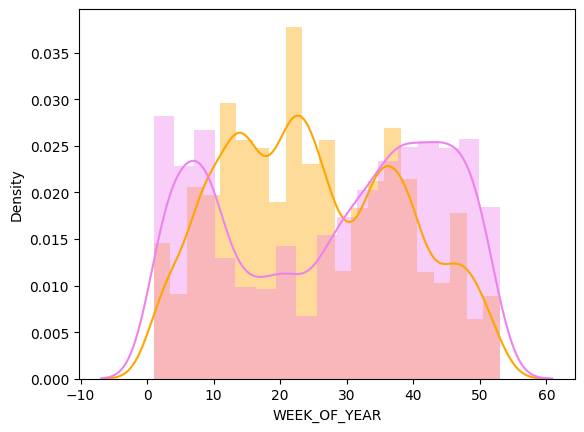

In [271]:
for col in df3.columns:
    plt.figure()
    sns.distplot(df3[col], kde=True, norm_hist=True, color='orange')
    sns.distplot(df4[col], kde=True, norm_hist=True, color='violet')

# CO2 Exploration

/tmp/ipykernel_7533/2053078200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df0[col], kde=True, norm_hist=True, color='violet')
/tmp/ipykernel_7533/2053078200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col], kde=True, norm_hist=True, color='grey')
/tmp/ipykernel_7533/20530782

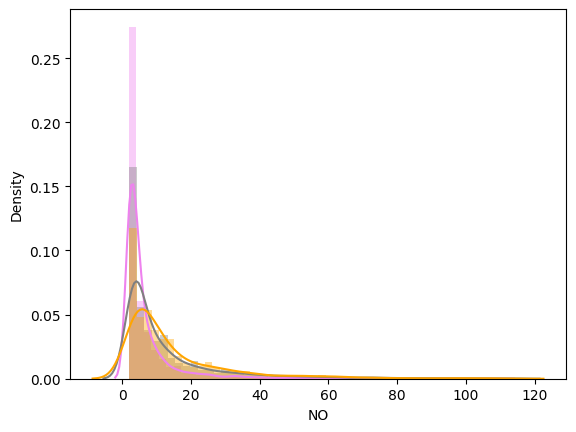

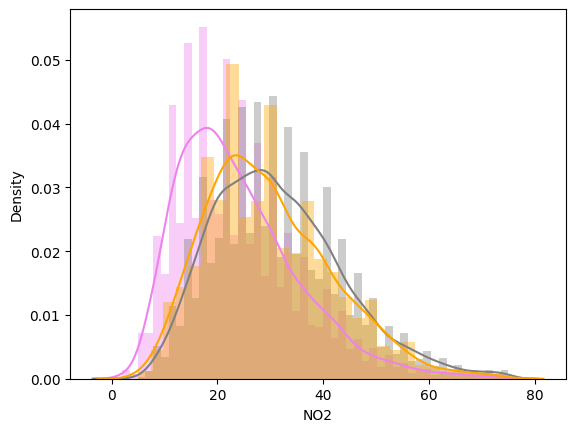

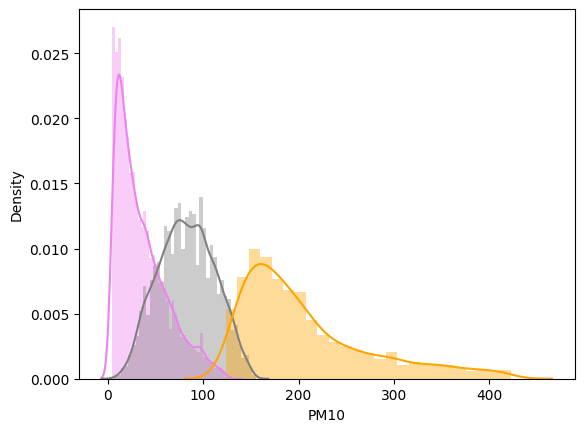

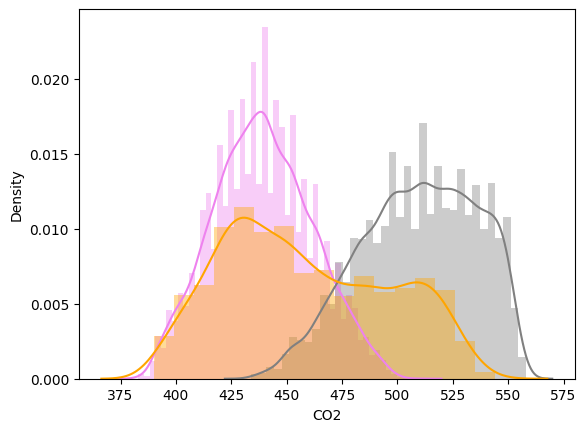

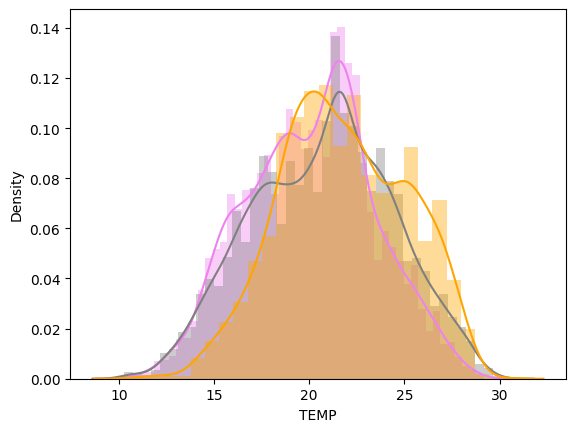

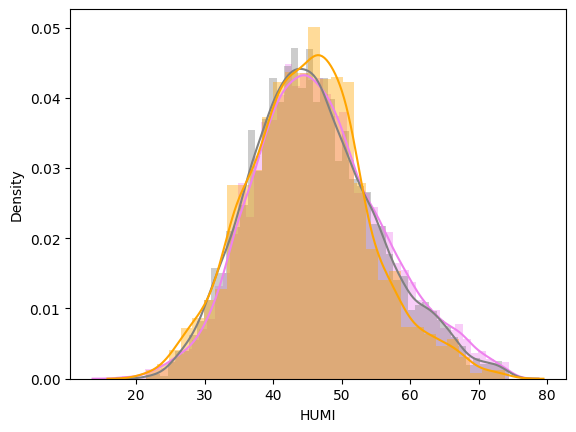

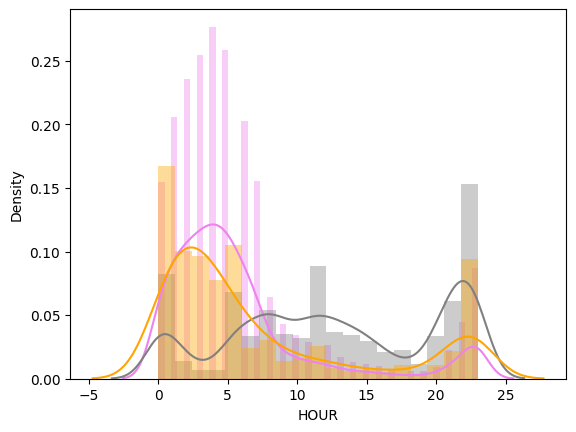

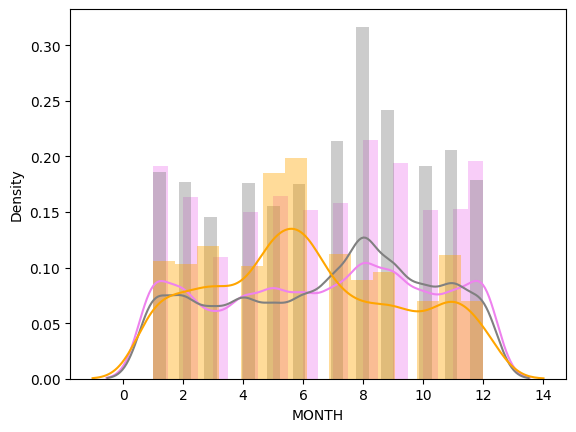

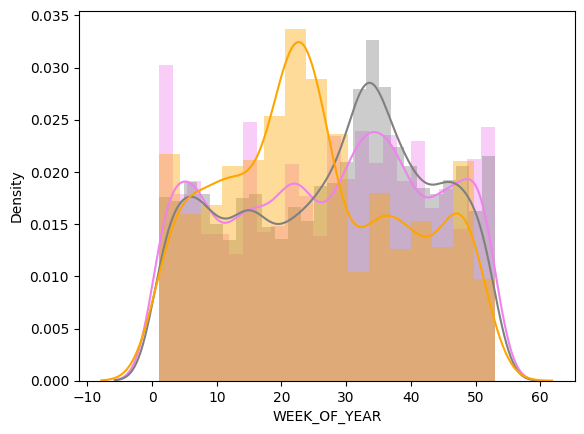

In [277]:
for col in df3.columns:
    plt.figure()
    sns.distplot(df0[col], kde=True, norm_hist=True, color='violet')
    sns.distplot(df1[col], kde=True, norm_hist=True, color='grey')
    sns.distplot(df6[col], kde=True, norm_hist=True, color='orange')

# Feature Importance

In [310]:
feats = df[ ['cluster'] + [ col for col in df.columns if col != 'WEEKEND' and col != 'cluster'] ]
feats.head()

,cluster,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,WEEKDAY
0,6,4.0,29.0,101.0,635.0,19.9,46.3,1,1,1,2
1,1,4.0,28.0,89.0,738.0,20.0,46.9,2,1,1,2
2,1,4.0,28.0,81.0,775.0,20.1,46.5,3,1,1,2
3,6,4.0,29.0,71.0,664.0,19.8,45.3,4,1,1,2
4,6,4.0,22.0,66.0,560.0,19.6,44.3,5,1,1,2


In [311]:
scaler = preprocessing.MinMaxScaler()
feats[feats.columns] = scaler.fit_transform(feats[feats.columns])

/tmp/ipykernel_7533/2618210378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats[feats.columns] = scaler.fit_transform(feats[feats.columns])


In [312]:
x = feats.iloc[:, 1:].values
y = feats.iloc[:, :1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

Feature: 0, Score: -0.04591
Feature: 1, Score: -0.19692
Feature: 2, Score: -0.36755
Feature: 3, Score: 0.54587
Feature: 4, Score: -0.12062
Feature: 5, Score: 0.00829
Feature: 6, Score: -0.13313
Feature: 7, Score: 0.02394
Feature: 8, Score: 0.00196
Feature: 9, Score: 0.00309


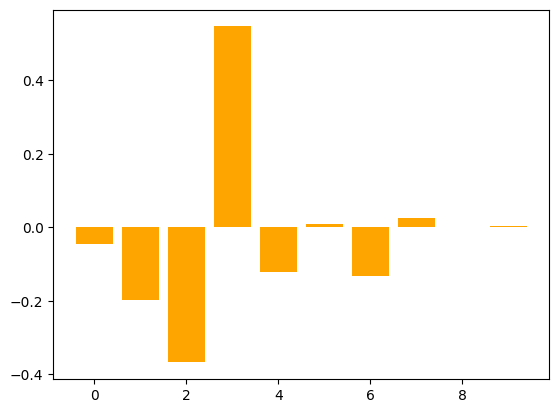

In [320]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
importance = model.coef_.ravel()

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color='orange')
plt.show()

In [326]:
df_mini = df[['CO2', 'PM10']]

In [328]:
kmeans = KMeans(n_clusters=8)
label = kmeans.fit_predict(df_mini)
df_mini['cluster'] = label

/tmp/ipykernel_7533/1365046388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['cluster'] = label


/home/amelie/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/amelie/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plo

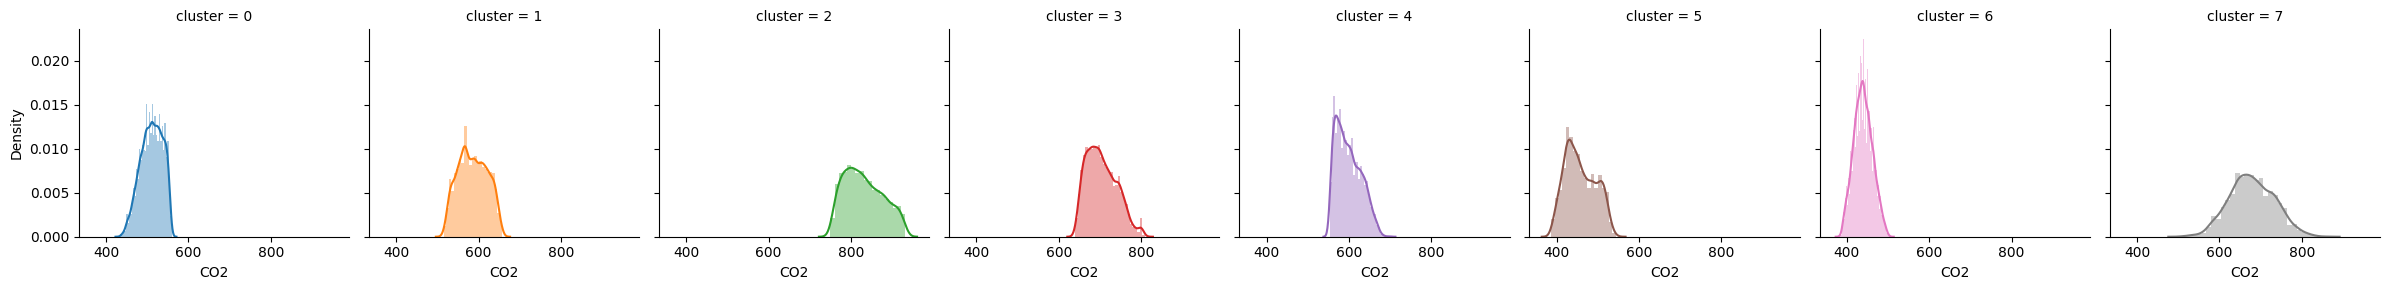

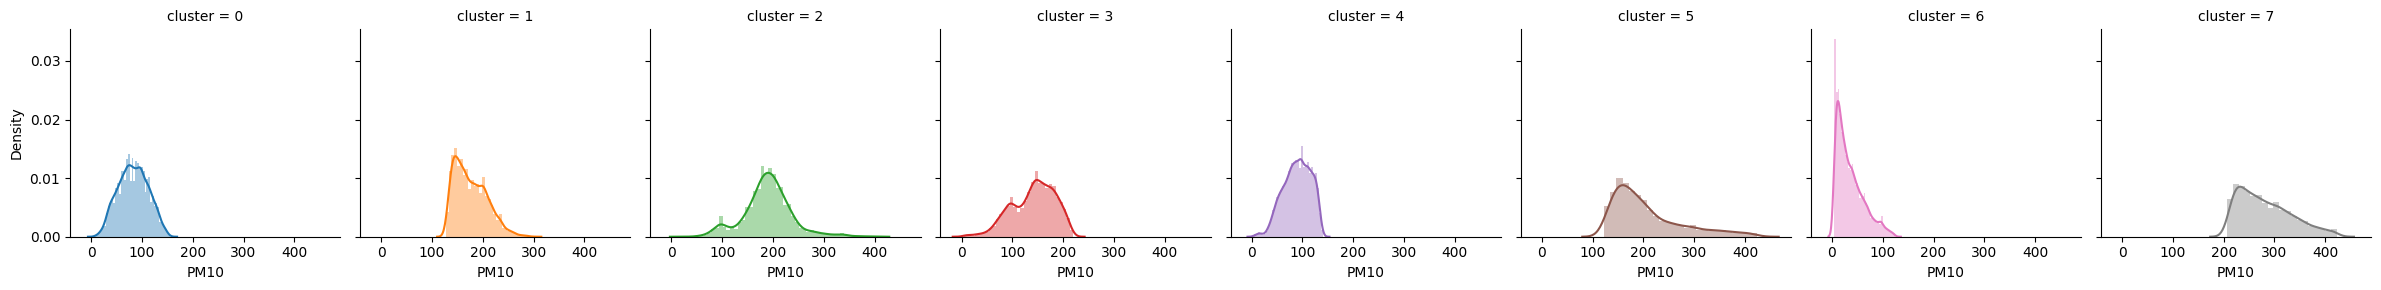

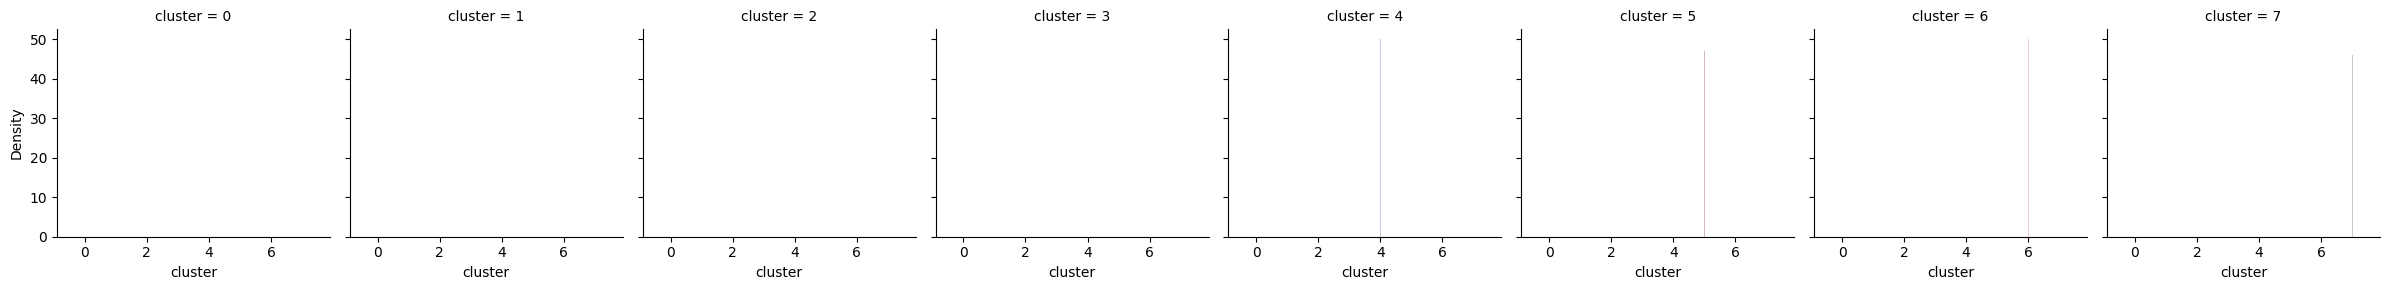

In [330]:
for col in df_mini.columns:
    grid = sns.FacetGrid(df_mini, col='cluster', hue='cluster')
    grid.map(sns.distplot, col)